6.423005847264067
-5.868550526029895
-0.0023753655087416577


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


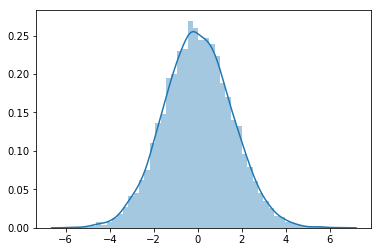

In [42]:
# GENERATING THE DATA FOR CSV FILE
# import Ma
import numpy as np
from random import random
import csv
import seaborn as sns
import math
import pandas as pd
# Generates a list containing n-number of factors
def populate_factors(n):
    s = 'Factor '
    f = [s+str(i) for i in range(1,n+1)]
    return f

# Randomly generates a list of sigma values (std deviations) corresponding to the number of factors between [0.1,0.3] 
def get_std_devs(factors):
    std_devs = []
    for i in factors:
        # Sampling from adding a normal and a uniform distribution to get the standard deviations for each factor
        v = np.random.normal(0,.05,1) + np.random.uniform(0.1,0.25,1)
        std_devs.append(v)
    return std_devs


# Samples from a normal distribution n-times to get the pct change for n-number of data points using the sigma values generated
def get_pct_changes(n,std_devs):
    p = []
    for dev in std_devs:
        # s is a list, so pct changes is a list of lists
        s = list(np.random.normal(0,dev,n))
        p.append(s)
    return p


# Calculates the returns on index based on time-units
def get_returns(pct_changes,numDataPoints):
    rets = []

    num_returns = numDataPoints
    i = 0
    tmp = 0
    factor_number = 0;
    while(i!=num_returns):
        summing = 0
        factor_number = 0
        for factor_change in pct_changes:
            factor_number+=1
#             tmp = 
#             print(fact)
            # MUST FIGURE OUT CORRECT RANGES FOR THE WEIGHTS AND THEIR CORRESPONDING FACTORS
#             tmp = math.log10(i**100)
            tmp = max( (math.log10(2.5*factor_number) - math.log10(125)+1),0 )
            w = np.random.uniform(0.1*tmp,1.4*tmp)
            summing+=w*factor_change[i]
#         print(loc)
        rets.append(summing)
        i+=1
#         print(i)
    return rets



# def write_csv():
#     myData = [factors,pct_changes,returns]
#     myFile = open('testingScript.csv', 'w')
#     with myFile:
#         writer = csv.writer(myFile)
#         writer.writerows(myData)


numFactors=100
numDataPoints = 10000


factors = populate_factors(numFactors)
std_devs = get_std_devs(factors)
pct_changes = get_pct_changes(numDataPoints,std_devs)
returns = get_returns(pct_changes,numDataPoints)




print(max(returns))
print(min(returns))
print(sum(returns)/len(returns))
sns.distplot(returns)
# write_csv()



In [43]:
df = pd.DataFrame(pct_changes).transpose()
df.to_csv("./percent_changes.csv")
# df = pd.DataFrame.to_csv("./pct_changes.csv")
# df = pd.DataFrame(list(zip(pct_changes, returns)))
# print(df)
# df = df.transpose()
# print(df)
# # print(df.head)

In [44]:
df2 = pd.DataFrame(returns)
df2.to_csv("./returns.csv")